# Abstract:



- [ ] unzip the files needed
- [ ] clean up the files
- [ ] start testing our model
- [ ] train our model on grammar/syntax first
- [ ] then train it on cognates, more specifically with greek/roman
- [ ] use our model to predict future slang trends

## Packages:

In [8]:
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
from scipy.spatial.distance import mahalanobis

## Virtual Environment:

In [9]:
"""
!pip3 install virtualenv
!virtualenv theanoEnv

!source /content/theanoEnv/bin/activate; pip3 install theano

!source /content/theanoEnv/bin/activate; pip3 list

!source /content/theanoEnv/bin/activate; pip3 install robotframework; pip3 list; python3 -m robot --help
"""

'\n!pip3 install virtualenv\n!virtualenv theanoEnv\n\n!source /content/theanoEnv/bin/activate; pip3 install theano\n\n!source /content/theanoEnv/bin/activate; pip3 list\n\n!source /content/theanoEnv/bin/activate; pip3 install robotframework; pip3 list; python3 -m robot --help\n'

## Data Cleaning:

In [10]:
folder_path = '/Users/brian/git/big_data_fall2022/asdrp-big-data/sentiment-analysis/iliad_csvs'

data = []

for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)

        csv_data = []

        with open(file_path, 'r', encoding='utf-8') as csv_file:
            csv_reader = csv.reader(csv_file)
            for row in csv_reader:
                for cell in row:
                    words = cell.split()
                    csv_data.extend(words)

        data.append(csv_data)

In [11]:
data

[['εὖ',
  'γὰρ',
  'ἐγὼ',
  'τόδε',
  'οἶδα',
  'κατὰ',
  'φρένα',
  'καὶ',
  'κατὰ',
  'θυμόν:',
  'ἔσσεται',
  'ἦμαρ',
  "ὅτ'",
  'ἄν',
  "ποτ'",
  'ὀλώλῃ',
  'Ἴλιος',
  'ἱρὴ',
  'καὶ',
  'Πρίαμος',
  'καὶ',
  'λαὸς',
  'ἐϋμμελίω',
  'Πριάμοιο'],
 ['τὼ',
  'δὲ',
  'δύω',
  'σκάζοντε',
  'βάτην',
  'Ἄρεος',
  'θεράποντε',
  'Τυδεί̈δης',
  'τε',
  'μενεπτόλεμος',
  'καὶ',
  'δῖος',
  'Ὀδυσσεὺς',
  'ἔγχει',
  'ἐρειδομένω:',
  'ἔτι',
  'γὰρ',
  'ἔχον',
  'ἕλκεα',
  'λυγρά:',
  'κὰδ',
  'δὲ',
  'μετὰ',
  'πρώτῃ',
  'ἀγορῇ',
  'ἵζοντο',
  'κιόντες'],
 ['τὸν',
  "δ'",
  "ἠμείβετ'",
  'ἔπειτα',
  'ποδάρκης',
  'δῖος',
  'Ἀχιλλεύς:',
  'Ἀτρεί̈δη',
  'κύδιστε',
  'φιλοκτεανώτατε',
  'πάντων,',
  'πῶς',
  'γάρ',
  'τοι',
  'δώσουσι',
  'γέρας',
  'μεγάθυμοι',
  'Ἀχαιοί;',
  'οὐδέ',
  'τί',
  'που',
  'ἴδμεν',
  'ξυνήϊα',
  'κείμενα',
  'πολλά:',
  'ἀλλὰ',
  'τὰ',
  'μὲν',
  'πολίων',
  'ἐξεπράθομεν,',
  'τὰ',
  'δέδασται,',
  'λαοὺς',
  "δ'",
  'οὐκ',
  'ἐπέοικε',
  'παλίλλογα',
  "ταῦτ'",
  '

## Running

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Mean of z-score normalized data: [-3.9345277e-08  4.7985775e-08]
Standard deviation of z-score normalized data: [0.9999934  0.99999285]


/var/folders/p0/blz2mfl57_j49rp6fv7g26_c0000gn/T/ipykernel_2797/3340098469.py:62: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(z_score_normalized_data[:, 0], z_score_normalized_data[:, 1], marker='o', cmap='viridis')


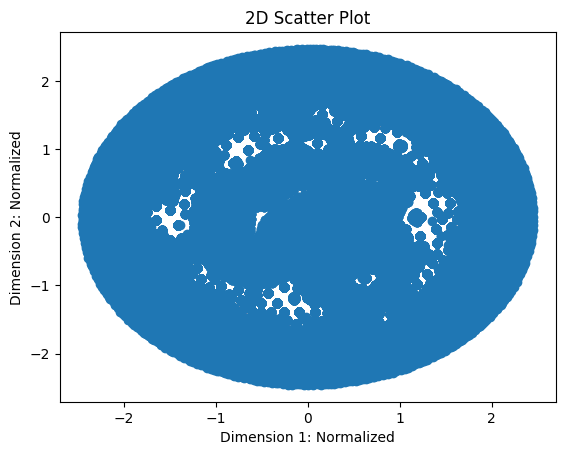

: 

: 

In [12]:
def affinity_propagation(X, max_iter=200, damping=0.8, convergence_iter=15, random_state=None):
    affinity_prop = AffinityPropagation(max_iter=max_iter, damping=damping, convergence_iter=convergence_iter, random_state=random_state)
    cluster_centers_indices = affinity_prop.fit_predict(X)
    cluster_centers = np.array([X[cluster_centers_indices == i].mean(axis=0) for i in np.unique(cluster_centers_indices)])
    return cluster_centers_indices, cluster_centers

def mahalanobis_distance(query_point, clusters, covariances, regularization=1e-6):
    distances = []
    for center, covariance in zip(clusters, covariances):
        inv_covariance = np.linalg.pinv(covariance + regularization * np.eye(covariance.shape[0]))
        distance = mahalanobis(query_point, center, inv_covariance)
        distances.append(distance)
    return distances

def compute_covariance_matrix(cluster_data):
    if cluster_data.shape[0] > 1:
        return np.cov(cluster_data, rowvar=False)
    else:
        num_features = cluster_data.shape[1]
        return np.eye(num_features)

def plot_clusters(X, cluster_centers_indices, cluster_centers, query_point, min_cluster_index, figsize=(24, 24)):
    num_clusters = len(np.unique(cluster_centers_indices))
    cmap = plt.get_cmap('tab20', num_clusters)

    plt.figure(figsize=figsize)

    plt.scatter(X[:, 0], X[:, 1], c=cluster_centers_indices, cmap=cmap)
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', color='black', label='Cluster Centers')
    plt.scatter(query_point[0], query_point[1], marker='D', color='red', s=100, label='Query Point')
    if min_cluster_index != -1:
        min_cluster_center = cluster_centers[min_cluster_index]
        plt.scatter(min_cluster_center[0], min_cluster_center[1], marker='o', color='green', s=100, label='Closest Cluster')
    plt.legend()
    plt.title("Clustering")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


def embed_linguistic_data(linguistic_data):
    model = Word2Vec(sentences=linguistic_data, vector_size=100, window=5, min_count=1, sg=0)
    embeddings = [model.wv[word] for sentence in linguistic_data for word in sentence]
    return np.array(embeddings)

if __name__ == "__main__":

    embeddings = embed_linguistic_data(data)

    n_dimensions = 2
    perplexity = 30
    tsne_model = TSNE(n_components=n_dimensions, perplexity=perplexity)
    n_dimensional_points = tsne_model.fit_transform(embeddings)

    mean_values = np.mean(n_dimensional_points, axis=0)
    std_values = np.std(n_dimensional_points, axis=0)
    z_score_normalized_data = (n_dimensional_points - mean_values) / std_values

    print("Mean of z-score normalized data:", np.mean(z_score_normalized_data, axis=0))
    print("Standard deviation of z-score normalized data:", np.std(z_score_normalized_data, axis=0))

    plt.scatter(z_score_normalized_data[:, 0], z_score_normalized_data[:, 1], marker='o', cmap='viridis')
    plt.xlabel('Dimension 1: Normalized')
    plt.ylabel('Dimension 2: Normalized')
    plt.title('2D Scatter Plot')
    plt.show()

    np.random.seed(42)
    X = z_score_normalized_data

    cluster_centers_indices, cluster_centers = affinity_propagation(X)

    if not cluster_centers.any():
        print("Clustering failed to converge.")
    else:
        clusters_data = [X[cluster_centers_indices == i] for i in range(len(cluster_centers))]
        covariances = [compute_covariance_matrix(cluster_data) for cluster_data in clusters_data]

        query_point = np.array([0.0, 0.0])

        distances = mahalanobis_distance(query_point, cluster_centers, covariances)

        min_distance = float('inf')
        min_cluster_index = -1
        for i, distance in enumerate(distances):
            if distance < min_distance:
                min_distance = distance
                min_cluster_index = i

        plot_clusters(X, cluster_centers_indices, cluster_centers, query_point, min_cluster_index)

        for i, distance in enumerate(distances):
            print(f"Cluster {i+1} - Mahalanobis Distance: {distance:.4f}")

        if min_cluster_index != -1:
            print(f"\nCluster with the smallest Mahalanobis distance: Cluster {min_cluster_index + 1}")